In [1]:
from pathlib import Path

data_dir = Path(".").resolve().parent / "data"
assert data_dir.is_dir()
import matplotlib.pyplot as plt

plt.style.use("science")
plt.style.use("notebook")

In [2]:
def read_timeseries(path):
    df = pd.read_csv(path, names=["index", "values"]).dropna()
    s = df["values"]
    s.index = pd.to_datetime(df["index"])
    return s

In [3]:
import pandas as pd

total_commits = read_timeseries(data_dir / "total_commits.csv")
total_educators = read_timeseries(data_dir / "total_educators.csv")
total_cauthors = read_timeseries(data_dir / "total_commit_authors.csv")
total_participants = read_timeseries(data_dir / "total_participants_events.csv")

## All in one

Text(0.5, 1.0, 'Cumulative statistics (w/o carpentry contributions to commits)')

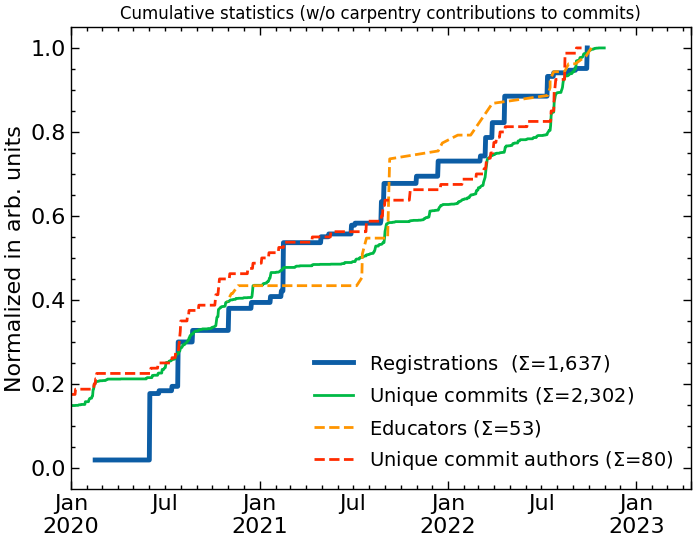

In [26]:
from matplotlib import pyplot as plt
import datetime
from dateutil import parser as date_parser


def norm(s):
    return s / s.max()


fig, ax = plt.subplots()
# ax.set_box_aspect(1)
ax = norm(total_participants).plot(
    ax=ax, label=f"Registrations  ($\Sigma$={int(total_participants.max()):,})", lw=3.5
)
ax = norm(total_commits).plot(
    ax=ax,
    label=f"Unique commits ($\Sigma$={total_commits.max():,})",
)
ax = norm(total_educators).plot(
    ax=ax, label=f"Educators ($\Sigma$={total_educators.max():,})", ls="--"
)
ax = norm(total_cauthors).plot(
    ax=ax, label=f"Unique commit authors ($\Sigma$={total_cauthors.max():,})", ls="--"
)

ax.set_xlim(date_parser.parse("01/01/2020"), datetime.datetime.now())
ax.set_xlim()
ax.set_ylabel("Normalized in arb. units")
ax.legend(fontsize=14)
import matplotlib.dates as mdates

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
# fig.autofmt_xdate()
ax.set_xlabel("")
ax.set_title(
    "Cumulative statistics (w/o carpentry contributions to commits)", fontsize=12
)

In [6]:
fig.savefig(
    "combined.png",
)

## Separate plots (and IRIS-HEP styling)

In [22]:
iris_hep_purple = "#6239b5"
iris_hep_blue = "#0083bf"
# Actually should use from https://iris-hep.org/docs/logo.html

In [75]:
def set_date_xaxis(ax):
    ax.set_xlim(date_parser.parse("01/01/2020"), datetime.datetime.now())
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(7,)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))
    ax.xaxis.set_tick_params(rotation=0)

Text(0.5, 1.0, 'Registrations and commits')

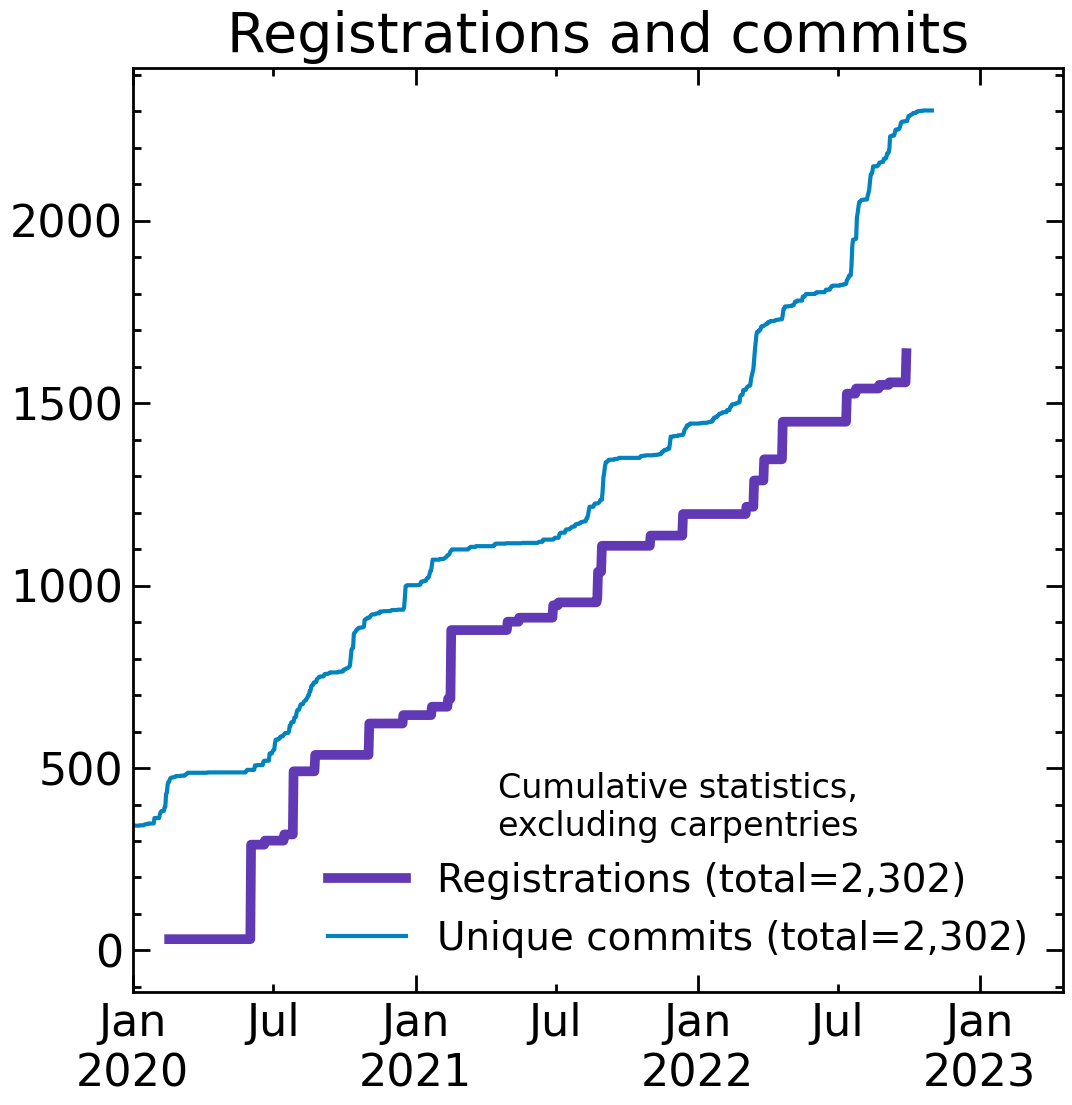

In [99]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=200)
ax.plot(
    total_participants,
    label=f"Registrations (total={total_commits.max():,})",
    lw=3.5,
    color=iris_hep_purple,
)
ax.plot(
    total_commits,
    label=f"Unique commits (total={total_commits.max():,})",
    lw=1.5,
    color=iris_hep_blue,
)
set_date_xaxis(ax)
ax.legend(
    fontsize=14,
    title="Cumulative statistics,\nexcluding carpentries",
    title_fontsize=12,
)


ax.set_xlabel("")
ax.set_title("Registrations and commits", fontsize=20)

Text(0.5, 1.0, 'Educators')

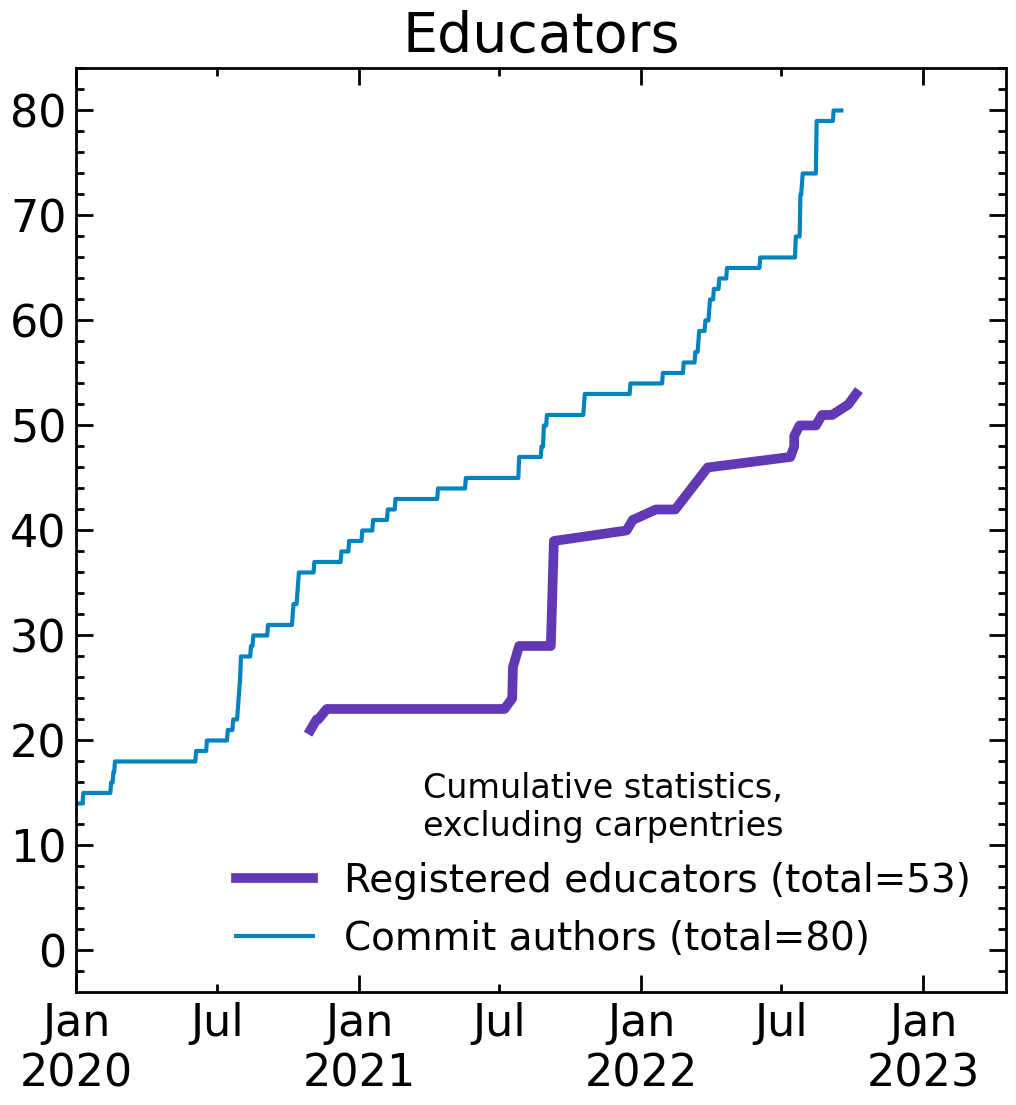

In [100]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=200)
ax.plot(
    total_educators,
    label=f"Registered educators (total={total_educators.max():,})",
    lw=3.5,
    color=iris_hep_purple,
)
ax.plot(
    total_cauthors,
    label=f"Commit authors (total={total_cauthors.max():,})",
    lw=1.5,
    color=iris_hep_blue,
)

set_date_xaxis(ax)
ax.legend(
    fontsize=14,
    title="Cumulative statistics,\nexcluding carpentries",
    title_fontsize=12,
)

ax.set_xlabel("")
ax.set_title("Educators", fontsize=20)